In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import time

In [2]:
ori_data = pd.read_csv("bgpclear0804217.csv")

C:\Users\liyaping22\AppData\Local\Temp\ipykernel_14568\3823318844.py:1: DtypeWarning: Columns (6,37,38,46,63,70,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  ori_data = pd.read_csv("bgpclear0804217.csv")


In [3]:
ori_data.head(10)

,name,time,EncodingPath,Producer,acl-in-rpf-packets,active-routes-count,af-name,as,backup-routes-count,bandwidth,...,total-cpu-five-minute,total-cpu-one-minute,total-number-of-drop-packets,unresolved-prefix-packets,unsupported-feature-packets,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
0,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867007675000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867008305000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf1,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867008484000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf7,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867008683000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine2,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867008698000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf5,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867008970000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,spine1,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867009201000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867009237000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf8,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867009314000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,leaf3,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,1501867009533000000,Cisco-IOS-XR-fib-common-oper:fib-statistics/no...,dr03,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
ori_data.columns.values

array(['name', 'time', 'EncodingPath', 'Producer', 'acl-in-rpf-packets',
       'active-routes-count', 'af-name', 'as', 'backup-routes-count',
       'bandwidth', 'bytes-received', 'bytes-sent', 'carrier-transitions',
       'checksum-error-packets', 'crc-errors', 'deleted-routes-count',
       'df-unreachable-packets', 'discard-packets',
       'encapsulation-failure-packets', 'fragmenation-consumed-packets',
       'fragmenation-failure-packets', 'free-application-memory',
       'free-physical-memory',
       'global__established-neighbors-count-total',
       'global__neighbors-count-total', 'global__nexthop-count',
       'global__restart-count', 'gre-error-drop',
       'gre-lookup-failed-drop', 'incomplete-adjacency-packets',
       'input-data-rate', 'input-drops', 'input-errors',
       'input-ignored-packets', 'input-load', 'input-packet-rate',
       'input-queue-drops', 'instance-name', 'interface-name',
       'lisp-decap-error-drops', 'lisp-encap-error-drops',
       'lis

In [5]:
ops_data = pd.concat([ori_data["time"], ori_data["free-physical-memory"]], axis=1)

In [6]:
ops_data.head()

,time,free-physical-memory
0,1501867007675000000,NaN
1,1501867008305000000,NaN
2,1501867008484000000,NaN
3,1501867008683000000,NaN
4,1501867008698000000,NaN


In [7]:
ops_data.shape

(515022, 2)

In [8]:
ops_data = ops_data.dropna()

In [9]:
ops_data.shape

(8320, 2)

In [10]:
ops_data.head()

,time,free-physical-memory
498382,1501867007655000000,3.337617e+09
498383,1501867007829000000,3.595305e+09
498384,1501867007982000000,3.302289e+09
498385,1501867008002000000,3.497415e+09
498386,1501867008266000000,3.467555e+09


In [11]:
for time_index in range(ops_data.shape[0]):
    time_int = ops_data.time.iloc[time_index]//1000000000
    timeArray = time.localtime(time_int)
    timeShow = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    ops_data.time.iloc[time_index] = timeShow

C:\Users\liyaping22\AppData\Local\Temp\ipykernel_14568\1619064317.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2017-08-05 01:16:47' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ops_data.time.iloc[time_index] = timeShow


In [12]:
ops_data.shape

(8320, 2)

In [13]:
ops_data.head()

,time,free-physical-memory
498382,2017-08-05 01:16:47,3.337617e+09
498383,2017-08-05 01:16:47,3.595305e+09
498384,2017-08-05 01:16:47,3.302289e+09
498385,2017-08-05 01:16:48,3.497415e+09
498386,2017-08-05 01:16:48,3.467555e+09


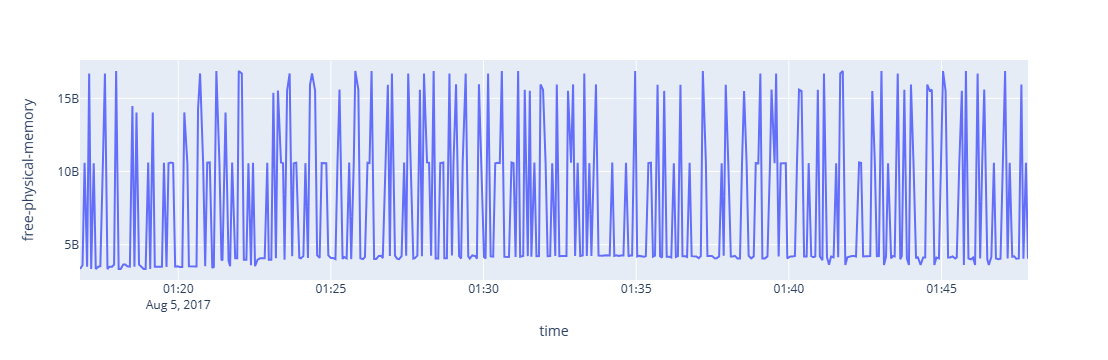

In [16]:
px.line(data_frame=ops_data[::20], x="time", y="free-physical-memory")

## 开始AI

In [17]:
from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.models import Sequential
import matplotlib.pyplot as plt

In [18]:
SEQ_LEN = 30

In [19]:
MEAN = ops_data["free-physical-memory"].mean()
STD = ops_data["free-physical-memory"].std()
data = (ops_data["free-physical-memory"] - MEAN) / STD

In [20]:
def load_data(data, seq_len, is_shuffle):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    if is_shuffle:
        np.random.shuffle(result)
    x_train = result[:, :-1]
    y_train = result[:, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train

In [21]:
x_train, y_train = load_data(data, SEQ_LEN, True)

In [22]:
print(x_train.shape)
print(y_train.shape)

(8289, 30, 1)
(8289,)


In [23]:
def build_model():
    model = Sequential()

    model.add(LSTM(50,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(50,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(100,return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

In [24]:
model = build_model()
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
62/62 [==============================] - 67s 964ms/step - loss: 0.7893 - val_loss: 0.7435
Epoch 2/100
62/62 [==============================] - 59s 952ms/step - loss: 0.7156 - val_loss: 0.7775
Epoch 3/100
62/62 [==============================] - 59s 960ms/step - loss: 0.7022 - val_loss: 0.7103
Epoch 4/100
62/62 [==============================] - 60s 962ms/step - loss: 0.6906 - val_loss: 0.7022
Epoch 5/100
62/62 [==============================] - 59s 949ms/step - loss: 0.6781 - val_loss: 0.6873
Epoch 6/100
62/62 [==============================] - 60s 963ms/step - loss: 0.6375 - val_loss: 0.6193
Epoch 7/100
62/62 [==============================] - 59s 955ms/step - loss: 0.5873 - val_loss: 0.5457
Epoch 8/100
62/62 [==============================] - 60s 964ms/step - loss: 0.5163 - val_loss: 0.4952
Epoch 9/100
62/62 [==============================] - 59s 958ms/step - loss: 0.4472 - val_loss: 0.3805
Epoch 10/100
62/62 [==============================] - 59s 958ms/step - loss: 0.387

In [25]:
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [26]:
x_test, y_test = load_data(data, SEQ_LEN, False)

In [27]:
predicted_data = predict_point_by_point(model, x_test)

In [28]:
y_test = y_test*STD + MEAN
predicted_data = predicted_data*STD + MEAN

In [30]:
new_data_np = np.vstack([ops_data["time"][31:],predicted_data,y_test]).T
new_data = pd.DataFrame(new_data_np, columns=["时间", "预测运维数据", "实际运维数据"])
new_data.head(10)

,时间,预测运维数据,实际运维数据
0,2017-08-05 01:16:53,3928890880.0,3640205312.0
1,2017-08-05 01:16:54,3813225984.0,3518472192.0
2,2017-08-05 01:16:54,3810555136.0,3505561600.0
3,2017-08-05 01:16:55,3810875648.0,3407224832.0
4,2017-08-05 01:16:55,4010312704.0,10616991744.0
5,2017-08-05 01:16:55,9843875840.0,10557022208.0
6,2017-08-05 01:16:55,14791917568.0,14468268032.0
7,2017-08-05 01:16:55,16637104128.0,16864972800.0
8,2017-08-05 01:16:56,5190127616.0,3529531392.0
9,2017-08-05 01:16:56,5209521152.0,10569117696.0


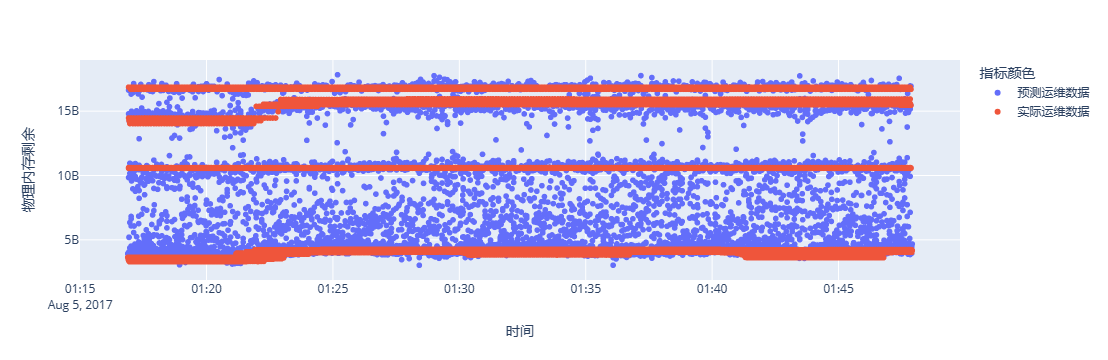

In [31]:
px.scatter(data_frame=new_data, x="时间", y=["预测运维数据", "实际运维数据"], labels={"value":"物理内存剩余", "variable":"指标颜色"})

In [32]:
from sklearn.metrics import mean_absolute_error as MAE

In [33]:
mae_data = MAE(y_test, predicted_data)

In [34]:
mae_data

858815244.9714079

In [35]:
loss_data = new_data["预测运维数据"] - new_data["实际运维数据"]

In [36]:
loss_data

0        288685568.0
1        294753792.0
2        304993536.0
3        403650816.0
4      -6606679040.0
            ...     
8284    -172445952.0
8285     -67133952.0
8286     235456768.0
8287     237837312.0
8288     500290560.0
Length: 8289, dtype: object

In [37]:
error_param = 0.948e+10
problem_time_list = []
problem_time_index = []
for index in range(loss_data.shape[0]):
    if loss_data[index] > (mae_data + error_param):
        problem_time = new_data.iloc[index, 0]
        #print(loss_data[index])
        problem_time_list.append(problem_time)
        problem_time_index.append(index)
len(problem_time_list)

5

In [38]:
problem_time_list

['2017-08-05 01:21:46',
 '2017-08-05 01:23:58',
 '2017-08-05 01:26:01',
 '2017-08-05 01:30:53',
 '2017-08-05 01:36:52']

In [39]:
problem_data = pd.DataFrame(new_data, index=problem_time_index)

In [40]:
problem_data

,时间,预测运维数据,实际运维数据
1307,2017-08-05 01:21:46,15129427968.0,3471564800.0
1894,2017-08-05 01:23:58,15769162752.0,4012765184.0
2445,2017-08-05 01:26:01,15437520896.0,4265578496.0
3745,2017-08-05 01:30:53,16526262272.0,4265140224.0
5343,2017-08-05 01:36:52,14832621568.0,4232527872.0


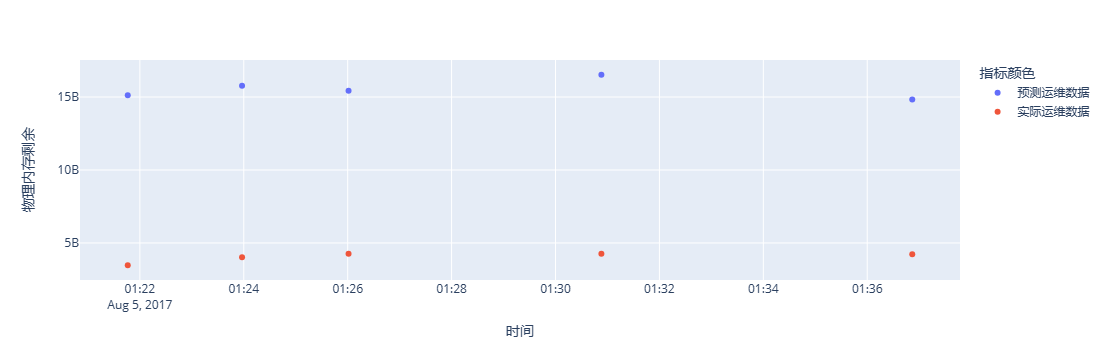

In [41]:
px.scatter(data_frame=problem_data, x="时间", y=["预测运维数据", "实际运维数据"], labels={"value":"物理内存剩余", "variable":"指标颜色"})